### Geometric Transformations of Images

- geometric transformation to images like 
    - translation
    - rotation
    - affine transformation 
    - etc............
    

#### Transformations
- OpenCV provides two transformation functions, cv2.warpAffine and cv2.warpPerspective, with which you can have all kinds of transformations. 
- cv2.warpAffine takes a 2x3 transformation matrix.
- cv2.warpPerspective takes a 3x3 transformation matrix as input.

#### scalling
- Scaling is just resizing of the image. 
- OpenCV comes with a function cv2.resize() for this purpose. The size of the image can be specified manually, or you can specify the scaling factor. 
- Different interpolation methods are used. 
    - cv2.INTER_AREA for shrinking 
    - cv2.INTER_CUBIC (slow) 
    - cv2.INTER_LINEAR for zooming. 
- By default, interpolation method used is cv2.INTER_LINEAR for all resizing purposes.

In [1]:
import cv2
import numpy as np
img=cv2.imread('standard_test_images\\standard_test_images\\1.tiff')
res=cv2.resize(img,None,fx=2,fy=2,interpolation=cv2.INTER_CUBIC)
        # OR
res=cv2.resize(img,None,2,2,cv2.INTER_CUBIC)

        # OR
    
height,width=img.shape[:2]
res=cv2.resize(img,(2*width,2*height),interpolation=cv2.INTER_CUBIC)
        # OR
res=cv2.resize(img,(415,415),cv2.INTER_CUBIC)
cv2.imshow('img',img)
cv2.imshow('res',res)
cv2.waitKey(0)
cv2.destroyAllWindows()


### Translation
- Translation is the shifting of object’s location. If you know the shift in (x,y) direction let it be (𝑡𝑥, 𝑡𝑦)<br><br>

- You can take make it into a Numpy array of type np.float32 and pass it into cv2.warpAffine() function. See below example for a shift of (100,50)<br><br>

- Third argument of the cv2.warpAffine() function is the size of the output image, which should be in the form of (width, height). Remember width = number of columns, and height = number of rows.

In [4]:
img=cv2.imread('standard_test_images\\standard_test_images\\1.tiff')
w,h=img.shape[:2]
floatvalue=np.float32([[1,0,100],[0,1,50]])
trans=cv2.warpAffine(img,floatvalue,(w,h))

cv2.imshow("img",img)
cv2.imshow('trans',trans)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Rotation
- Rotation of an image for an angle 𝜃 is achieved by the transformation matrix of the form
- cv2.getRotaionMatrix2D()

In [8]:
img=cv2.imread('standard_test_images\\standard_test_images\\1.tiff')
w,h=img.shape[:2]
r=cv2.getRotationMatrix2D((w/2,h/2),90,1)
rotate=cv2.warpAffine(img,r,(w,h))
cv2.imshow('rotate',rotate)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Affine Transformation
- In affine transformation, all parallel lines in the original image will still be parallel in the output image. To find the transformation matrix, we need three points from input image and their corresponding locations in output image.
- cv2.getAffineTransform will create a 2x3 matrix which is to be passed to cv2.warpAffine

In [11]:
w,h=img.shape[:2]
pst1=np.float32([[50,50],[200,50],[50,200]])
pst2=np.float32([[10,100],[200,50],[100,250]])

t=cv2.getAffineTransform(pst1,pst2)
trans=cv2.warpAffine(img,t,(w,h))
cv2.imshow('img',img)
cv2.imshow('trans',trans)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Perspective Transformation

- perspective transformation, you need a 3x3 transformation matrix. Straight lines will remain straight even after the transformation. To find this transformation matrix, you need 4 points on the input image and corresponding points on the output image. Among these 4 points, 3 of them should not be collinear. Then transformation matrix can be found by the function cv2.getPerspectiveTransform. Then apply cv2.warpPerspective with this 3x3 transformation matrix.

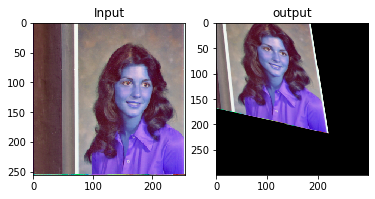

In [16]:
import matplotlib.pyplot as plt

w,h=img.shape[:2]
pst1=np.float32([[56,65],[368,52],[28,389],[380,390]])
pst2=np.float32([[0,0],[300,52],[0,300],[380,390]])

m=cv2.getPerspectiveTransform(pst1,pst2)
dst=cv2.warpPerspective(img,m,(300,300))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('output')
plt.show()